In [4]:
import pandas as pd

customer_data = pd.read_csv("C:/data sets/client_data (1).csv")
pricing_data = pd.read_csv("C:/data sets/price_data (1).csv")

In [6]:
# Display data types of each column
print("Customer Data Types:")
print(customer_data.dtypes)

print("\nPricing Data Types:")
print(pricing_data.dtypes)


Customer Data Types:
id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up    

In [7]:
# Generate descriptive statistics for both datasets
print("\nCustomer Data Descriptive Statistics:")
print(customer_data.describe())

print("\nPricing Data Descriptive Statistics:")
print(pricing_data.describe())



Customer Data Descriptive Statistics:
           cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289            

In [15]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [21]:
pricing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [11]:
# Print the column names`
print("Customer Data Columns:")
print(customer_data.columns)


Customer Data Columns:
Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')


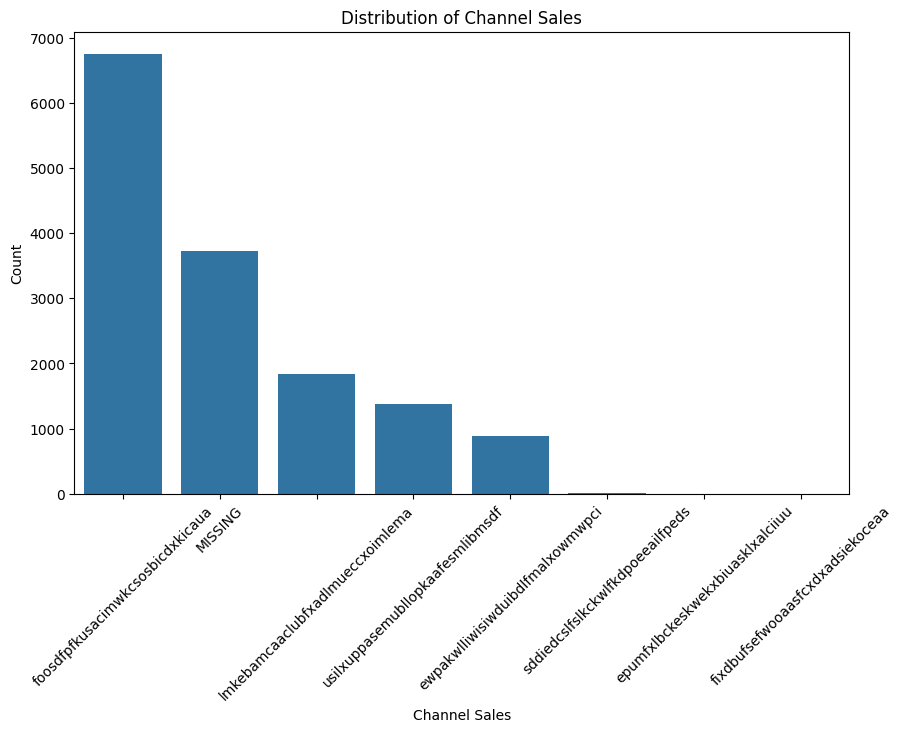

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_data, x='channel_sales', order=customer_data['channel_sales'].value_counts().index)
plt.title('Distribution of Channel Sales')
plt.xlabel('Channel Sales')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


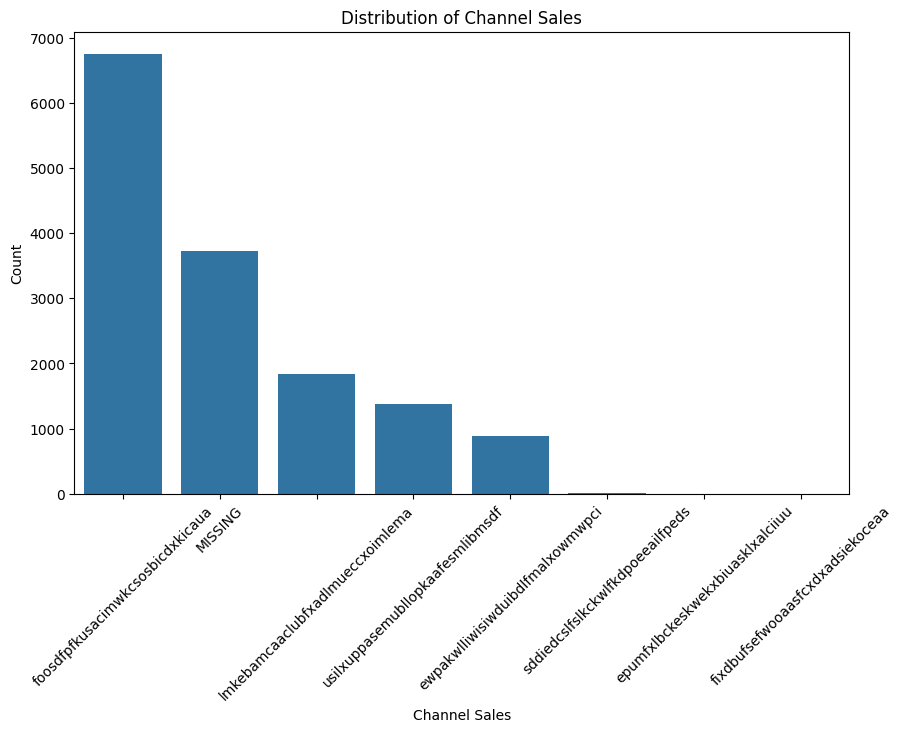

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_data, x='channel_sales', order=customer_data['channel_sales'].value_counts().index)
plt.title('Distribution of Channel Sales')
plt.xlabel('Channel Sales')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


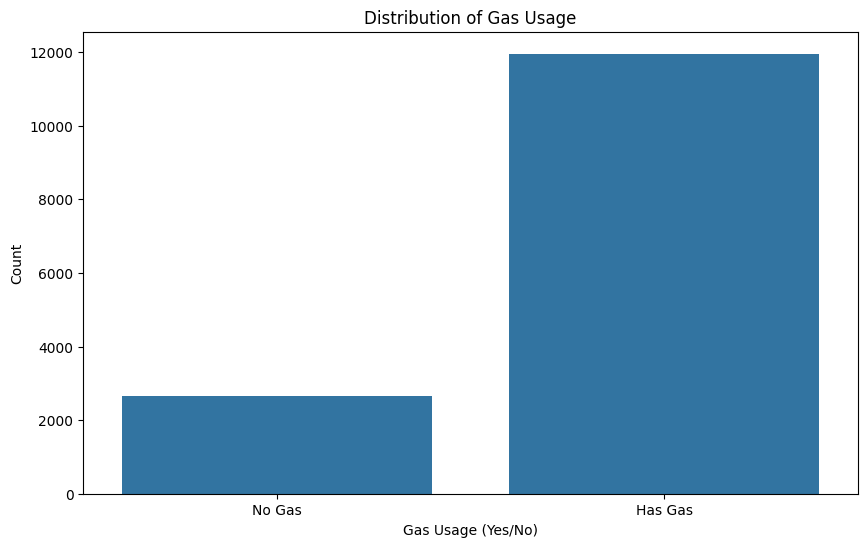

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_data, x='has_gas')
plt.title('Distribution of Gas Usage')
plt.xlabel('Gas Usage (Yes/No)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Gas', 'Has Gas'])
plt.show()


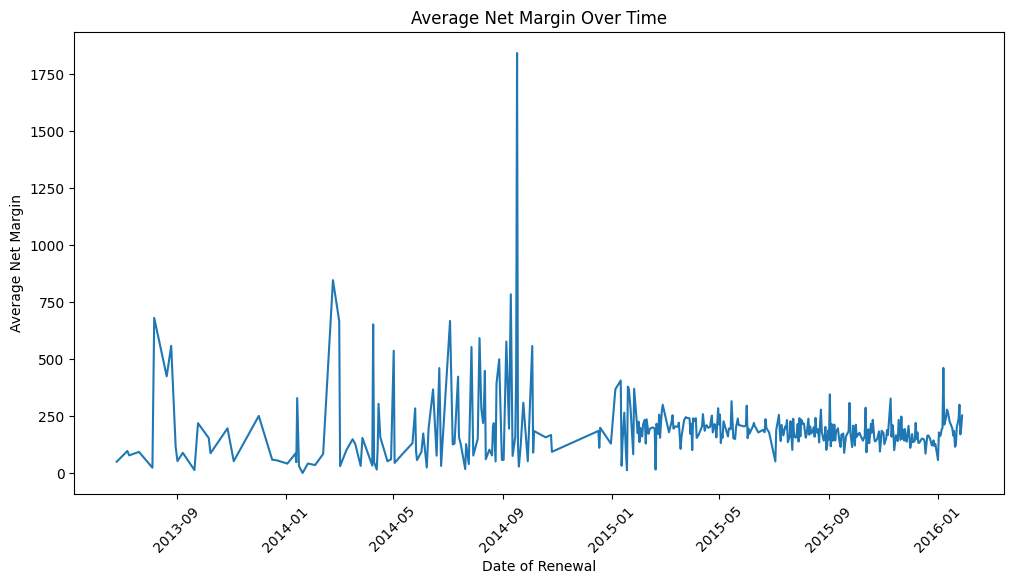

In [26]:
customer_data['date_renewal'] = pd.to_datetime(customer_data['date_renewal'])
avg_margin = customer_data.groupby('date_renewal')['net_margin'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_margin, x='date_renewal', y='net_margin')
plt.title('Average Net Margin Over Time')
plt.xlabel('Date of Renewal')
plt.ylabel('Average Net Margin')
plt.xticks(rotation=45)
plt.show()


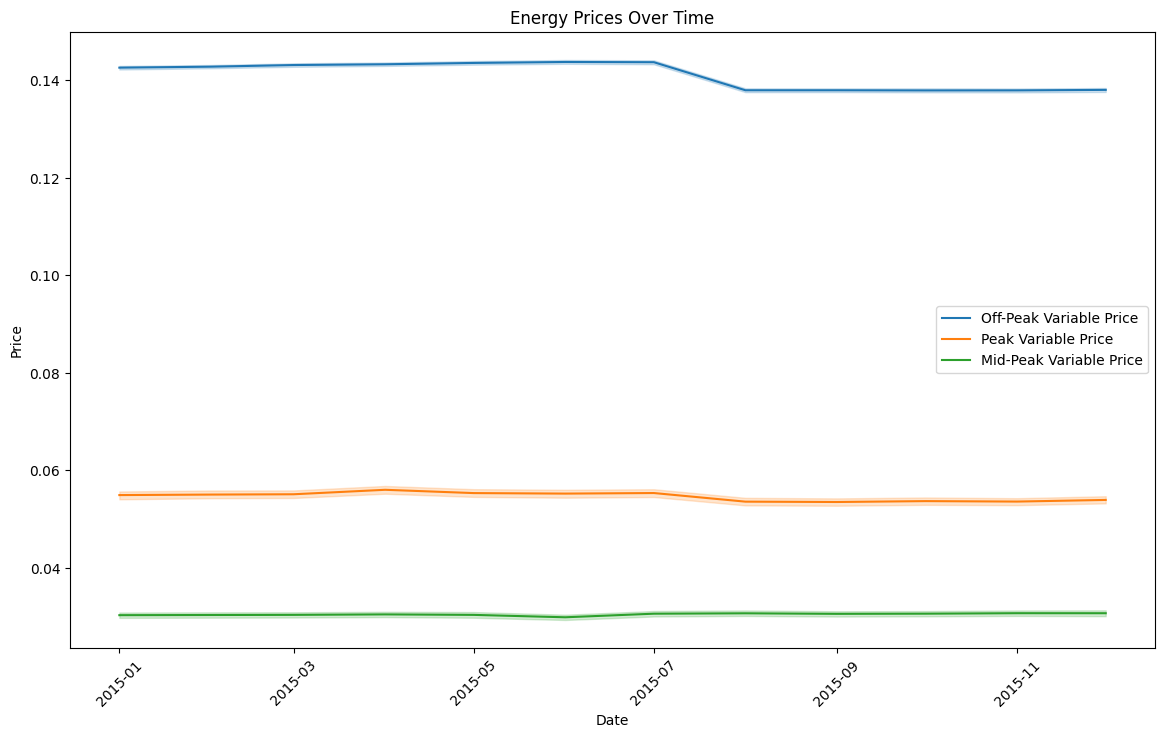

In [32]:
pricing_data['price_date'] = pd.to_datetime(pricing_data['price_date'])
plt.figure(figsize=(14, 8))

sns.lineplot(data=pricing_data, x='price_date', y='price_off_peak_var', label='Off-Peak Variable Price')
sns.lineplot(data=pricing_data, x='price_date', y='price_peak_var', label='Peak Variable Price')
sns.lineplot(data=pricing_data, x='price_date', y='price_mid_peak_var', label='Mid-Peak Variable Price')

plt.title('Energy Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()


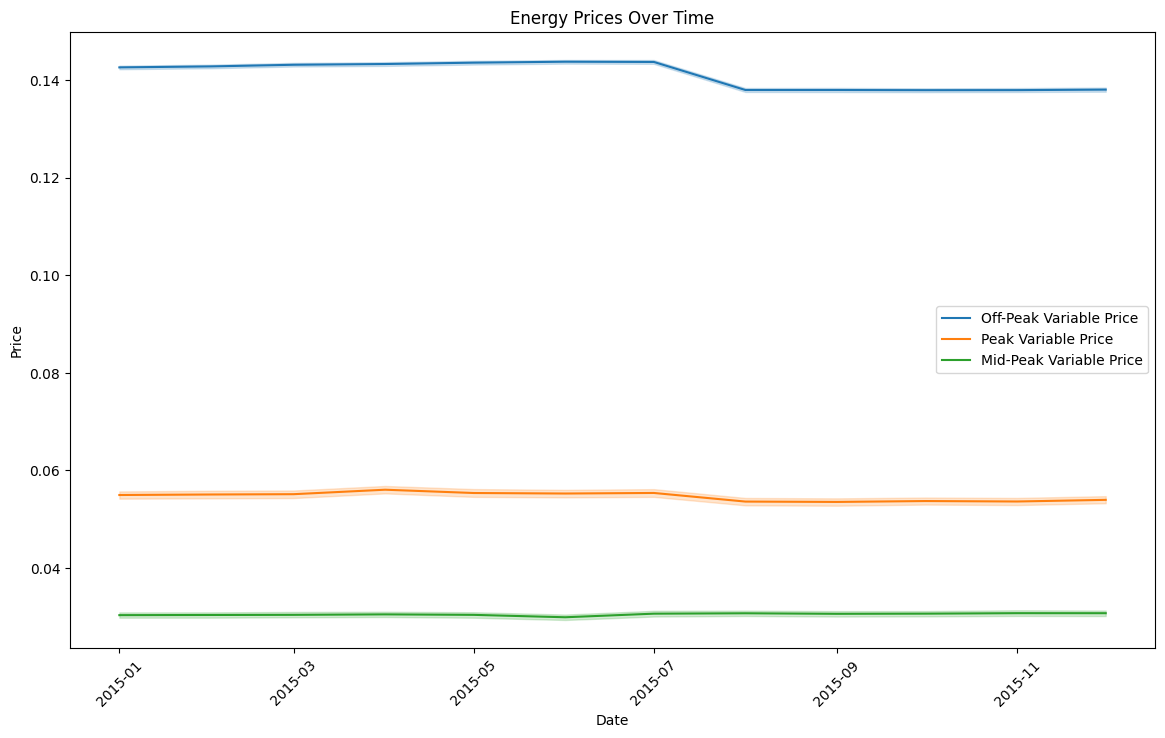

In [36]:
pricing_data['price_date'] = pd.to_datetime(pricing_data['price_date'])
plt.figure(figsize=(14, 8))

sns.lineplot(data=pricing_data, x='price_date', y='price_off_peak_var', label='Off-Peak Variable Price')
sns.lineplot(data=pricing_data, x='price_date', y='price_peak_var', label='Peak Variable Price')
sns.lineplot(data=pricing_data, x='price_date', y='price_mid_peak_var', label='Mid-Peak Variable Price')

plt.title('Energy Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()


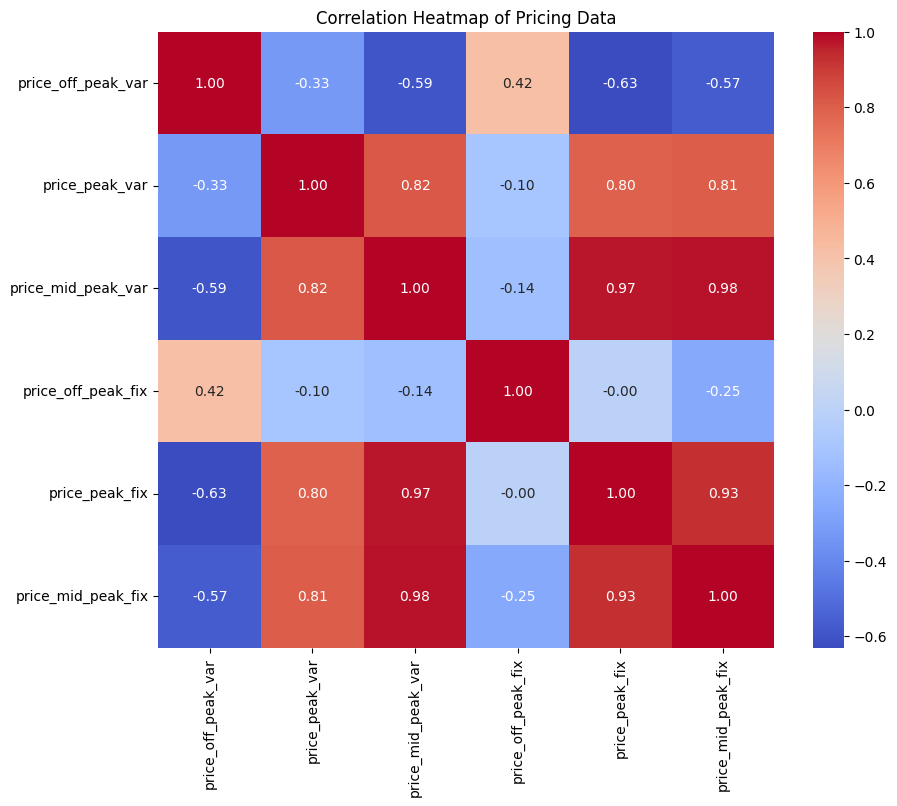

In [37]:
plt.figure(figsize=(10, 8))
price_correlation = pricing_data[['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']].corr()
sns.heatmap(price_correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Pricing Data')
plt.show()
